# Jack's finding minima

In [42]:
import os
import numpy as np
from simulation_module import SimulationConfig, SimulationState, SimulationRunner, SimulationIO, SimulationVisualizer, AnimationMaker
from time import time
import utility_functions as utility

input_path = "input"
output_path = "output"

# Configure our simulation object with 8 ions, and gamma = 1. NOTE THAT MOST PARAMETERS IN THE CONFIG ARE NOT IMPORTANT HERE
config = SimulationConfig(
    N = 28,                        # number of ions
    w = 1.0,                      # frequency in the trap harmonic potential
    g = 0.05,                        # isotropy factor
    m = 137.327,                  # mass in atomic units
    T_mK = 0,                     # temperature in mK
    dt = 10**-3,                  # timestep
    num_steps = int(5*10**4),     # number of simulation steps
    damping = False,              # damping is turned off for now
    damping_parameter = 1.0,      # since damping is turned off, the strength of the damping parameter is not relevant
    langevin_temperature = False, # langevin_temperature is turned off for now (no random motion)
    lasers=[],                    # we have no lasers
    input_path = input_path,      # this is the input file we won't use
    output_path = output_path     # this is where we will put all outputs
)

state = SimulationState(config)

🔍 Minimizing potential energy for N = 28 ions...
✅ Minimization complete. Final energy: 642383.2629 κ 
🔍 Solving for force balance (∑F = 0) for N = 28 ions...
✅ Force minimization complete. RMS force: 1.628488778338719e-06 amu·μm·μs⁻²


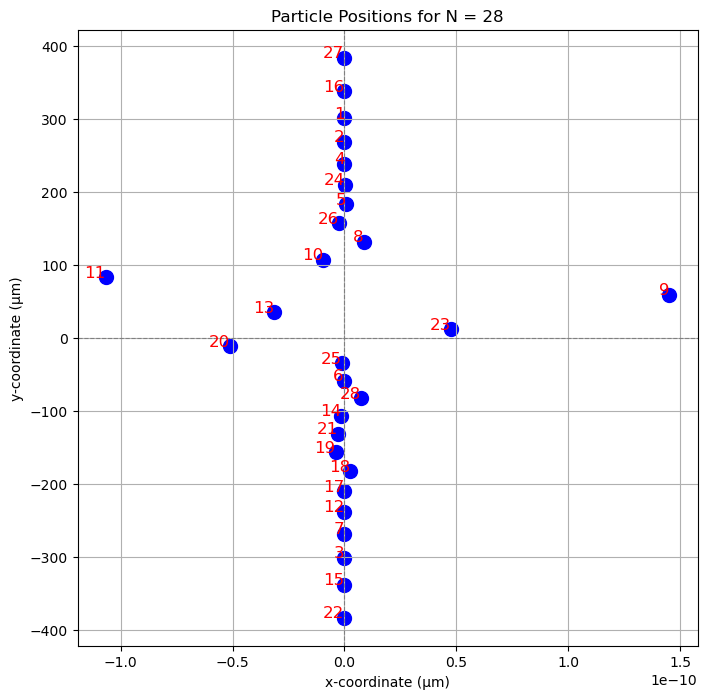

In [43]:
# Set the gamma to be very small and minimize energy/forces
state = SimulationState(config)
state.initialize_positions(method = "random")
state.minimize_energy()
state.minimize_forces()
SimulationVisualizer().plot_positions(state, square = False)

Note however that if the x-axis positions of the ions are all zero, then when a quench to larger gamma is performed, since this is indeed a position of (albeit unstable) equilibrium, the forces on the ions are indeed all zero, and so the ions may not move from their positions. To counter this, it is useful to have tiny deviations in the x-coordinate of the ions. We can add this in manually, to be able to control it via the below code: 

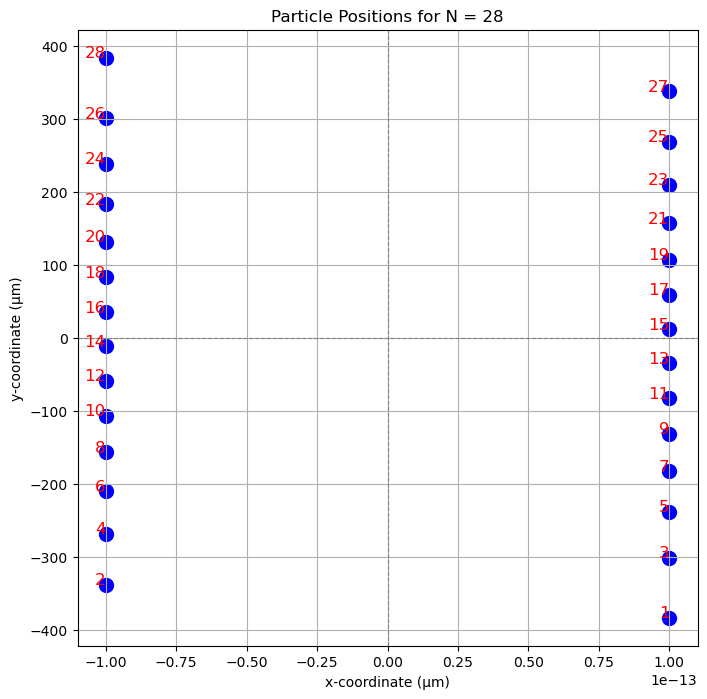

In [47]:
# Build the oscillation pattern:
deviation_magnitude = 1e-13

# Produce zigzag pattern:
pattern = deviation_magnitude * utility.zigzag(config.N)

# We can also produce a zigzag DEFECT pattern with a defect at position 3 by uncommenting the line below:
# pattern = deviation_magnitude * utility.zigzagdefect(config.N, 10)
    
# Sort state.positions on the y-axis value so that it lines up
state.sort_positions(axis = 1)
    
# Display the positions
state.positions = np.array([[pattern[i],state.positions[i,1]] for i in range(len(state.positions))])
SimulationVisualizer().plot_positions(state, square = False)

In [48]:
IO = SimulationIO(input_path = input_path, output_path = output_path)
IO.save_positions(positions = state.positions, filename = f"{config.N}_{config.g}_positions_1.json")